## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from sklearn.model_selection import GridSearchCV

## Loading Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

### Perform required cleaning to bring the uniformity in the data.



In [5]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df['Weekend'] = df['Weekend'].astype('object')

In [7]:
df['Revenue'] = df['Revenue'].astype('object')

In [8]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [9]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [10]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='object')

In [11]:
df_cat = pd.get_dummies(df_cat,drop_first=True)

In [12]:
x= df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']]

In [13]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0


### Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.


uni_variate analysis:

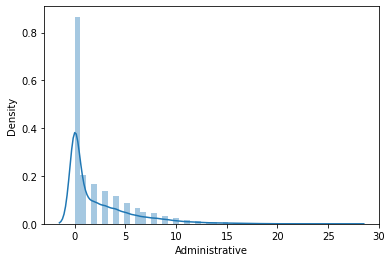

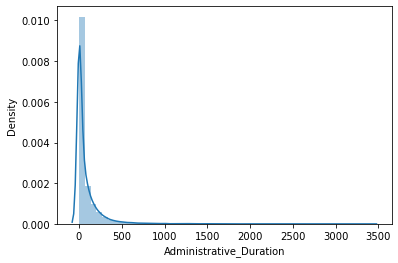

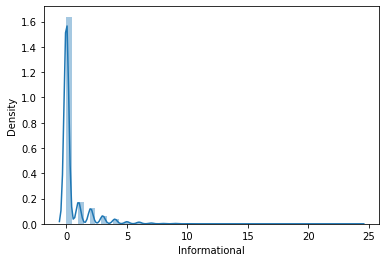

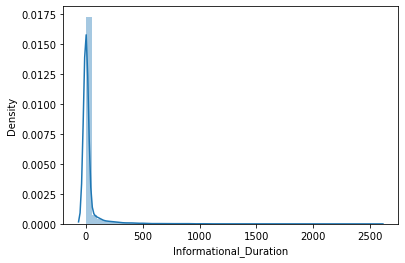

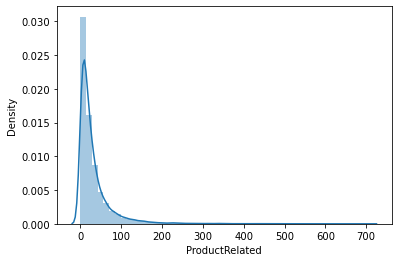

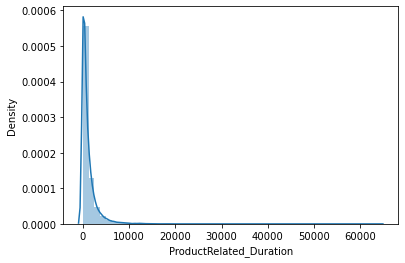

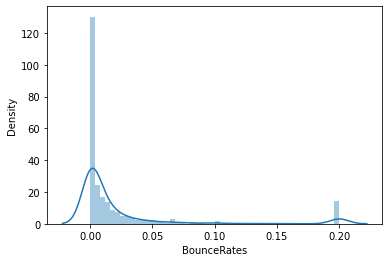

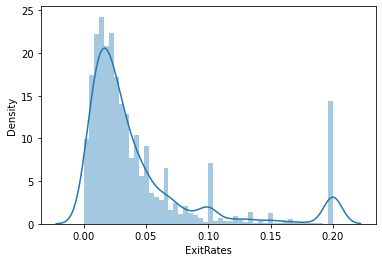

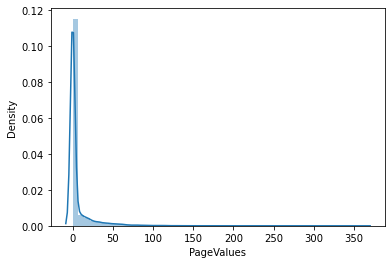

In [14]:
for i in x.columns:
    sns.distplot(x[i])
    plt.show()

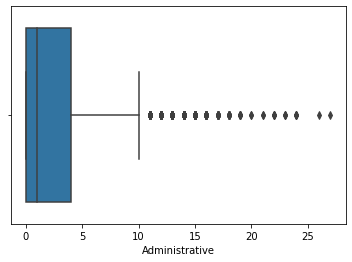

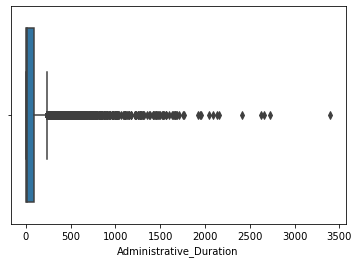

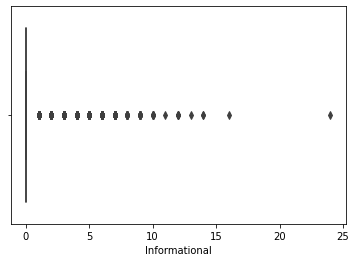

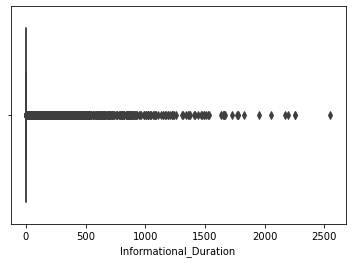

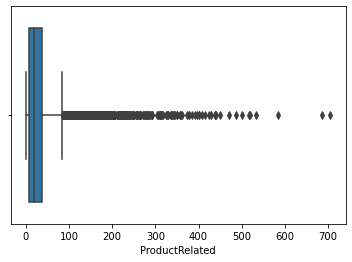

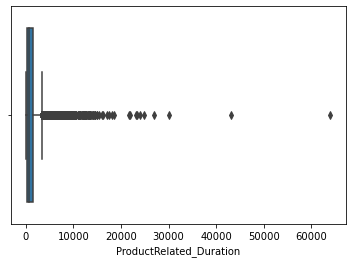

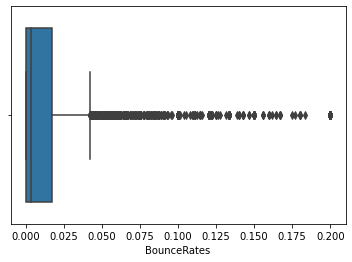

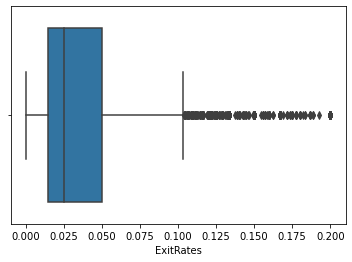

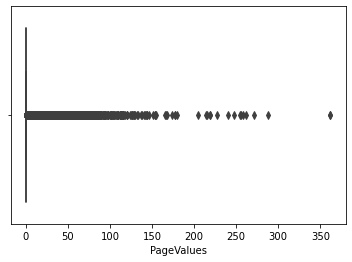

In [15]:
for i in x.columns:
    sns.boxplot(x[i])
    plt.show()

In [16]:
# we can observe from the figures that we can observe outliers from the figure.

multi-variate analysis:

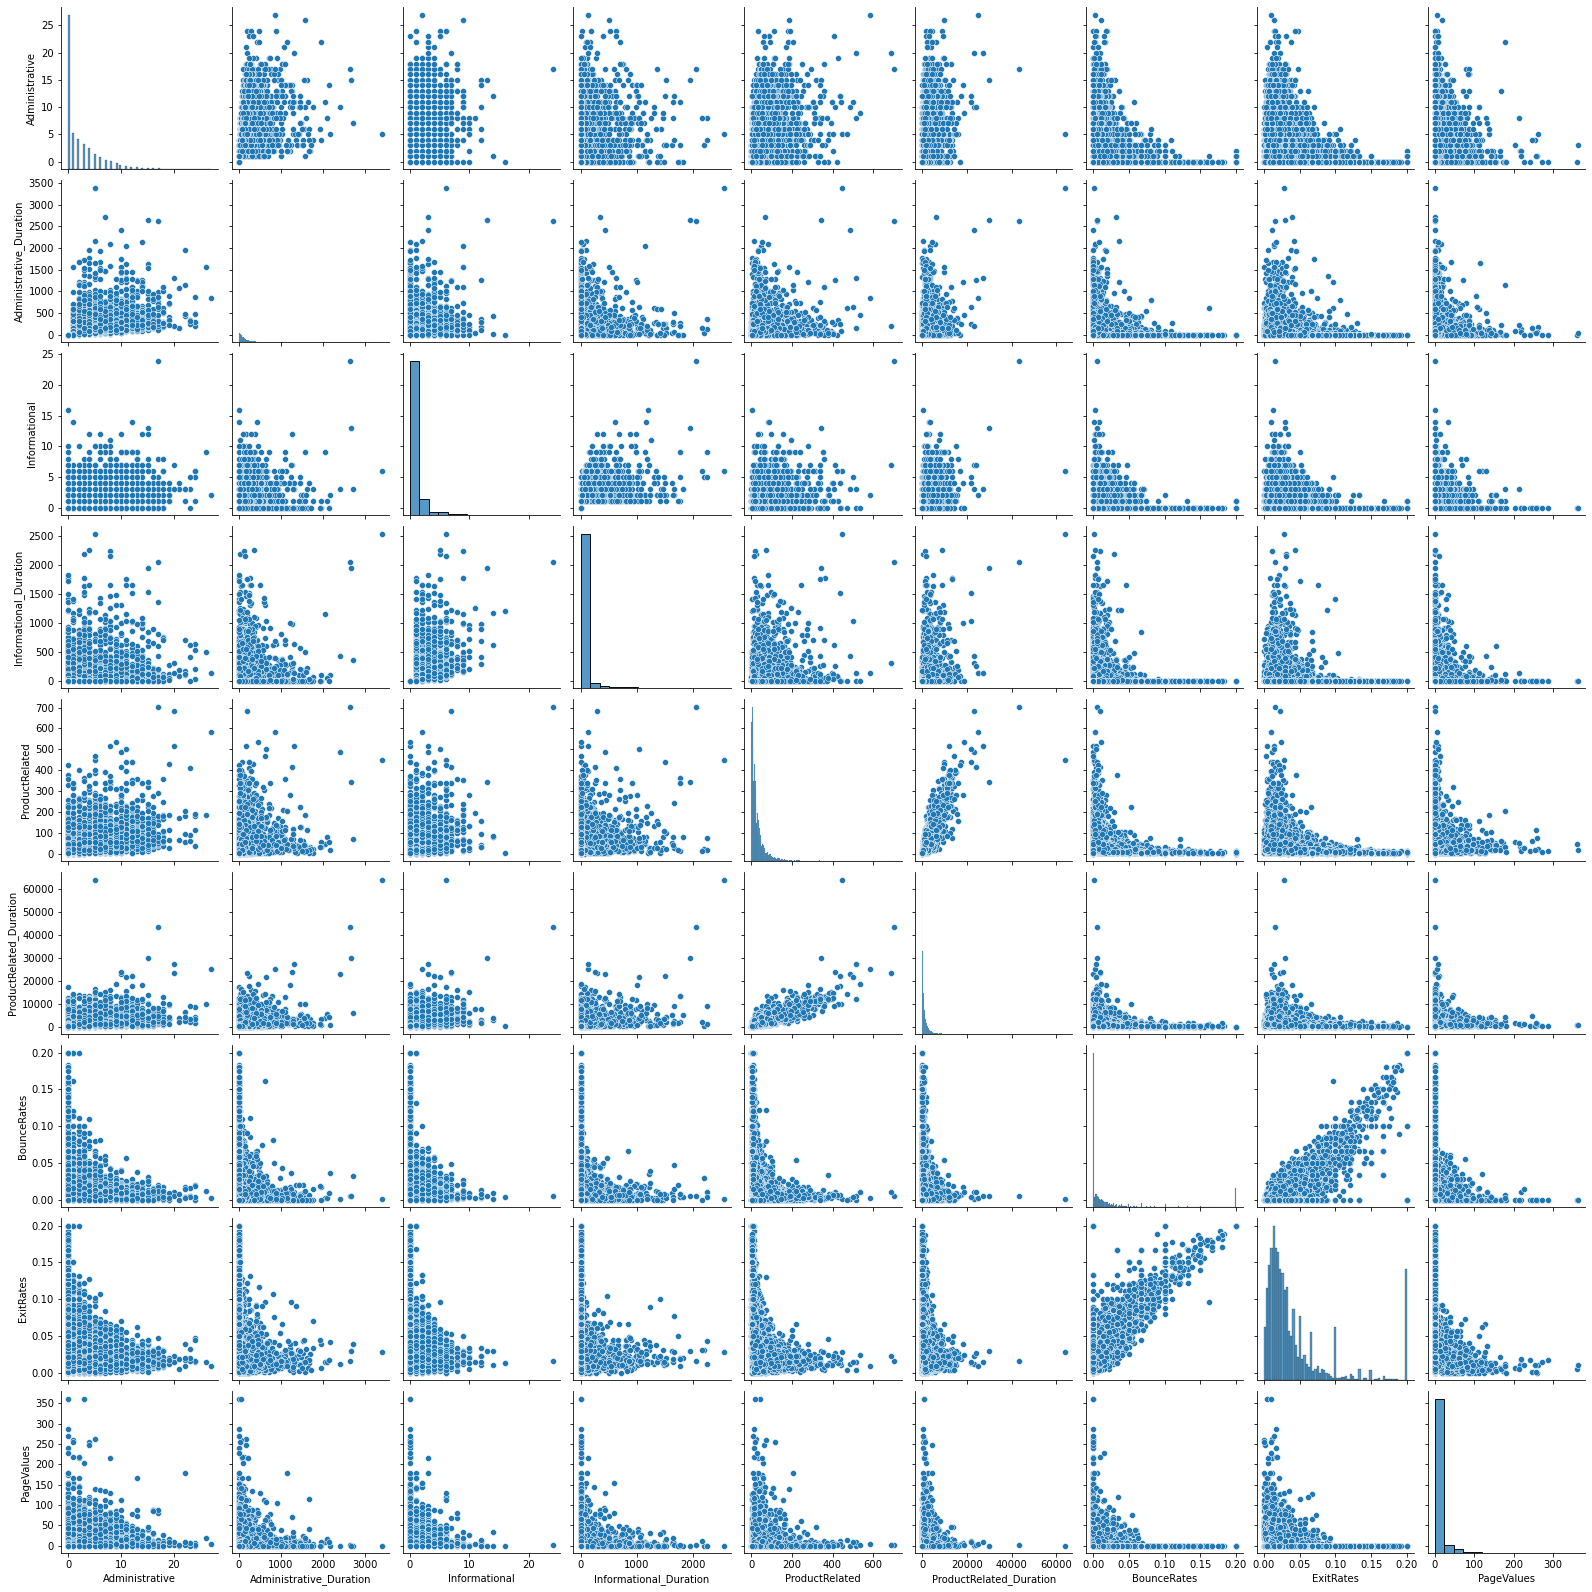

In [17]:
sns.pairplot(x)
plt.show()

### Perform required missing value treatment


In [18]:
x.isnull().sum()/len(df)*100

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
dtype: float64

In [19]:
# There are no null values present in the data

### Perform Outlier treatment if required


In [20]:
q1=x.quantile(q=0.25)
q3=x.quantile(q=0.75)

iqr=q3-q1

lower_limit = q1-1.5*iqr

upper_limit = q3+1.5*iqr


df1=x[~((x<lower_limit)|(x>upper_limit)).any(axis = 1)]
df1.shape

(5878, 9)

### Perform appropriate scaling


In [21]:
mx = MinMaxScaler()

df_scaled = pd.DataFrame(mx.fit_transform(x),columns = x.columns)


In [22]:
df_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0


### Build the different cluster models.


In [23]:
from sklearn.cluster import KMeans

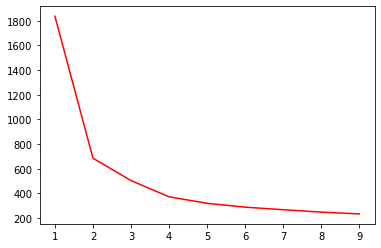

In [24]:
inertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10),inertia,color='red')
plt.show()

In [25]:
# the optimal number of clusters are 2

In [26]:
kmeans_v1 = KMeans(n_clusters=2)
kmeans_v1.fit(df_scaled)
labels = kmeans_v1.predict(df_scaled)

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled,labels)

0.7391839961970151

In [27]:
df['Cluster'] = labels
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


In [28]:
df['Cluster'].value_counts()

0    11295
1     1035
Name: Cluster, dtype: int64

### Analyse the optimum number of cluster using appropriate techniques.


In [29]:
cluster_0 = df[df['Cluster']==0]
cluster_0.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster
count,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.0
mean,2.522975,88.092395,0.548296,37.623149,34.372554,1299.213851,0.008852,0.030380,6.428911,0.057990,2.119876,2.360336,3.154316,3.994334,0.0
std,3.394620,182.866003,1.317272,146.653780,45.547517,1965.783268,0.014629,0.024052,19.310980,0.194427,0.895540,1.705246,2.405354,3.928095,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,9.000000,259.000000,0.000000,0.013333,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.0
50%,1.000000,19.200000,0.000000,0.000000,20.000000,690.958333,0.001111,0.023394,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.0
75%,4.000000,103.600000,0.000000,0.000000,41.000000,1581.494155,0.012200,0.040000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000,0.0
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.100000,0.140000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,0.0


In [30]:
cluster_1 = df[df['Cluster']==1]
cluster_1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.0,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.0
mean,0.047343,1.439485,0.015459,0.088116,2.909179,54.686422,0.167766,0.181588,0.0,0.098937,2.169082,2.321739,3.071498,4.890821,1.0
std,0.286174,22.023092,0.151564,1.520525,4.261685,192.860530,0.050400,0.029587,0.0,0.239497,1.068002,1.843977,2.359947,4.890153,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096299,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.120714,0.160000,0.0,0.000000,1.000000,2.000000,1.000000,1.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,2.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,3.000000,18.000000,0.200000,0.200000,0.0,0.000000,3.000000,2.000000,4.000000,6.000000,1.0
max,4.000000,613.666667,2.000000,34.200000,71.000000,2251.280000,0.200000,0.200000,0.0,1.000000,8.000000,13.000000,9.000000,20.000000,1.0


### Make the appropriate business interpretation using the cluster centroids.


In [ ]:
# cluster 0 has high administrative between 2 clusters.
# cluster 1 has high bonus rates,exitrates , operating systems and trafic types compared to cluster 1
# where as remaing varibales cluster 0 is high .

### Perform the EDA on cluster groups to understand the cluster characteristics.


In [31]:
centroids=pd.DataFrame(kmeans_v1.cluster_centers_,columns=df_scaled.columns)

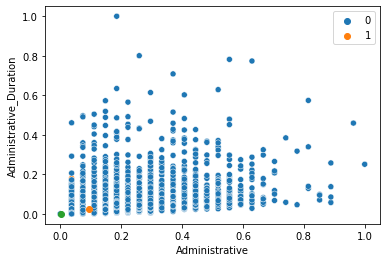

In [35]:
sns.scatterplot(x='Administrative',y='Administrative_Duration',data=df_scaled,hue=list(df['Cluster']))
plt.scatter(centroids.iloc[0,0],centroids.iloc[0,1])
plt.scatter(centroids.iloc[1,0],centroids.iloc[1,1])
plt.show()


### Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.

In [36]:
from sklearn.decomposition import PCA

In [47]:
model=PCA(n_components=1)
pca_val=model.fit_transform(df_scaled)

km = KMeans(n_clusters=2)
km_v3 = km.fit(pca_val)

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_val,km_v3.labels_)

0.8592730017176282

In [ ]:
# PCA method helps to increase the silhouette score compared to kmean clustering.

In [56]:
cov_mat = np.cov(df_scaled,rowvar=False)
cov_mat


array([[ 1.51361449e-02,  3.84959602e-03,  2.45370654e-03,
         1.73781046e-03,  3.34608446e-03,  1.37617936e-03,
        -6.66828276e-03, -9.46092022e-03,  6.25097045e-04],
       [ 3.84959602e-03,  2.70534983e-03,  8.33266716e-04,
         6.83529648e-04,  9.48574541e-04,  5.52996764e-04,
        -1.81800472e-03, -2.60092430e-03,  1.80494177e-04],
       [ 2.45370654e-03,  8.33266716e-04,  2.80086345e-03,
         1.80849557e-03,  1.24922325e-03,  6.13465645e-04,
        -1.48982850e-03, -2.10465035e-03,  1.32103903e-04],
       [ 1.73781046e-03,  6.83529648e-04,  1.80849557e-03,
         3.04807050e-03,  9.75380452e-04,  5.73671675e-04,
        -9.91384509e-04, -1.41226414e-03,  8.74522572e-05],
       [ 3.34608446e-03,  9.48574541e-04,  1.24922325e-03,
         9.75380452e-04,  3.97982072e-03,  1.62466799e-03,
        -3.12893875e-03, -4.48406610e-03,  1.82242637e-04],
       [ 1.37617936e-03,  5.52996764e-04,  6.13465645e-04,
         5.73671675e-04,  1.62466799e-03,  8.948149

In [57]:
eigen_val, eigen_vec = np.linalg.eig(cov_mat)


In [59]:
print('Eigen Values:',eigen_val)
print('Eigen Vectors:',eigen_vec)


Eigen Values: [0.11465497 0.01689051 0.00489375 0.00442086 0.00017551 0.00107297
 0.00160156 0.00284905 0.00245893]
Eigen Vectors: [[-1.18003158e-01  8.65013081e-01 -3.09371889e-01 -2.70684396e-01
   2.84390580e-02 -4.86583369e-02 -2.54201003e-01 -2.57437718e-02
  -1.97309797e-02]
 [-3.26138742e-02  2.51854170e-01 -7.42027719e-02 -1.26943080e-03
  -8.94028609e-02  3.22398896e-02  9.56474705e-01 -7.71583251e-02
  -1.29845429e-02]
 [-2.63774271e-02  1.93332496e-01  1.06421613e-01  4.94744174e-01
   5.23622034e-03  7.67390751e-01 -9.51328425e-02 -3.22806428e-01
  -6.04912325e-02]
 [-1.81468410e-02  1.55445966e-01  1.18973689e-01  5.77912147e-01
  -5.26411526e-02 -6.35078057e-01 -5.32640214e-02 -4.57102353e-01
  -9.74433646e-02]
 [-5.28593395e-02  2.44226988e-01  2.67629907e-01  3.99221777e-01
  -3.85803726e-01 -3.95208609e-02 -1.88612314e-02  7.19331931e-01
   1.95843530e-01]
 [-2.21111382e-02  1.06127968e-01  1.10535960e-01  2.11110634e-01
   9.16188633e-01 -5.28538700e-02  9.06685937e-0

In [58]:
eigen_val

array([0.11465497, 0.01689051, 0.00489375, 0.00442086, 0.00017551,
       0.00107297, 0.00160156, 0.00284905, 0.00245893])

In [ ]:
# Eigen value >0.01 , that is important component 
# eigen_val1,eigen_val2 are greater than 0.01 those are most imortant components.

In [60]:
eigen_vec[:,0:2]

array([[-0.11800316,  0.86501308],
       [-0.03261387,  0.25185417],
       [-0.02637743,  0.1933325 ],
       [-0.01814684,  0.15544597],
       [-0.05285934,  0.24422699],
       [-0.02211114,  0.10612797],
       [ 0.69702223,  0.23135177],
       [ 0.70306395, -0.03853799],
       [-0.02376117,  0.02936251]])

In [61]:
x_red =  pd.DataFrame(np.array(df_scaled)@eigen_vec[:,0:2],columns = ['PC1','PC2'])
x_red.head()

,PC1,PC2
0,1.400011,0.193160
1,0.351360,-0.018470
2,1.400011,0.193160
3,0.666249,0.031559
4,0.244502,0.018006


  
### Also try different graphs to visualize the clusters and its characteristics. 

In [50]:
ward_link=linkage(df_scaled,method='ward')
ward_link[:10]

array([[0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00],
       [6.0000e+00, 1.2330e+04, 0.0000e+00, 3.0000e+00],
       [1.6000e+01, 1.2331e+04, 0.0000e+00, 4.0000e+00],
       [7.0000e+00, 2.3320e+03, 0.0000e+00, 2.0000e+00],
       [8.0000e+00, 3.4450e+03, 0.0000e+00, 2.0000e+00],
       [2.4000e+01, 1.2332e+04, 0.0000e+00, 5.0000e+00],
       [1.8000e+01, 1.6340e+03, 0.0000e+00, 2.0000e+00],
       [2.1000e+01, 1.9000e+02, 0.0000e+00, 2.0000e+00],
       [2.2000e+01, 1.2125e+04, 0.0000e+00, 2.0000e+00],
       [2.3000e+01, 2.0070e+03, 0.0000e+00, 2.0000e+00]])

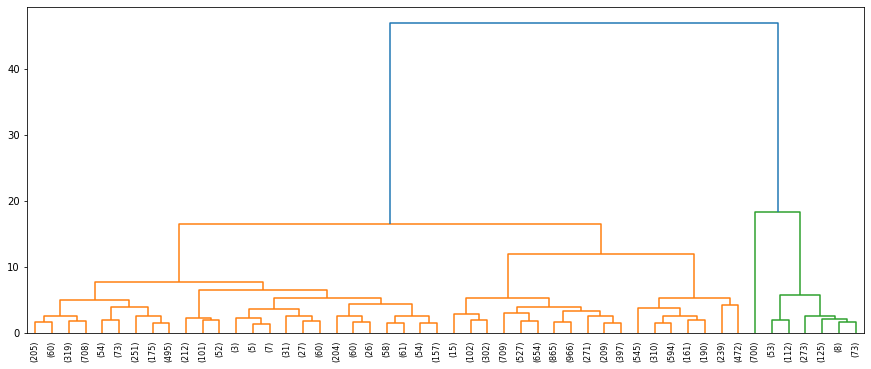

In [55]:
plt.figure(figsize=(15,6))
dendrogram(ward_link,truncate_mode='lastp',p=50)
plt.show()

In [ ]:
# by using dendrogram we can observe that 3 is minimal number of clusters.

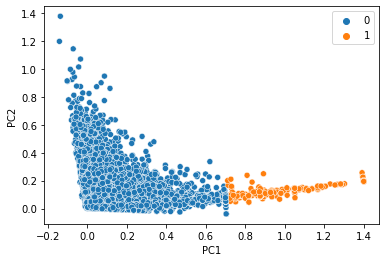

In [62]:
sns.scatterplot(x ='PC1',y='PC2',data=x_red,hue=list(km_v3.labels_))
plt.show()

In [ ]:
# we can observe 2 different pca clusters from pc1 and pc2 variables or eigen vectors.